<a href="https://colab.research.google.com/github/BenjaminRathman/Statistical-Analysis-of-Wages/blob/main/Stat_319_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Cleanup Data

In [ ]:
import csv
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
counters = {"Valid": 0, "Invalid": 0}
missingRows = {"Multiple Rows": 0}
data = []

def validateData(rowToCheck):
  isValid = True
  alreadyInvalid = False
  for eachKey, eachValue in rowToCheck.items():
    if eachValue in [None, "", "NA"]:

      if eachKey not in missingRows:
        missingRows[eachKey] = 0

      if alreadyInvalid:
        missingRows["Multiple Rows"] += 1

      missingRows[eachKey] += 1
      alreadyInvalid = True
      isValid = False

  return isValid

def importData():
  file_path = '/content/drive/My Drive/SLID.csv'
  with open(file_path, "r") as dataFile:
    csvReader = csv.DictReader(dataFile)

    for eachRow in csvReader:

      #Note this structure when conducting analysis!
      dataRow = {
        "Row ID": eachRow[""],
        "Wage": eachRow["wages"],
        "Education": eachRow["education"],
        "Age": eachRow["age"],
        "Sex": eachRow["sex"],
        "Language": eachRow["language"]
      }

      if validateData(dataRow):
        #Convert Ordinal Values to Workable Types
        dataRow["Wage"] = float(dataRow["Wage"])
        dataRow["Education"] = float(dataRow["Education"])
        dataRow["Age"] = int(dataRow["Age"])
        #Count the Data
        data.append(dataRow)
        counters["Valid"] += 1
      else:
        counters["Invalid"] += 1

importData()

print(data)
print(counters)
print(missingRows)

Mounted at /content/drive
[{'Row ID': '1', 'Wage': 10.56, 'Education': 15.0, 'Age': 40, 'Sex': 'Male', 'Language': 'English'}, {'Row ID': '2', 'Wage': 11.0, 'Education': 13.2, 'Age': 19, 'Sex': 'Male', 'Language': 'English'}, {'Row ID': '4', 'Wage': 17.76, 'Education': 14.0, 'Age': 46, 'Sex': 'Male', 'Language': 'Other'}, {'Row ID': '6', 'Wage': 14.0, 'Education': 16.0, 'Age': 50, 'Sex': 'Female', 'Language': 'English'}, {'Row ID': '9', 'Wage': 8.2, 'Education': 15.0, 'Age': 31, 'Sex': 'Male', 'Language': 'English'}, {'Row ID': '12', 'Wage': 16.97, 'Education': 13.5, 'Age': 30, 'Sex': 'Female', 'Language': 'English'}, {'Row ID': '14', 'Wage': 6.7, 'Education': 12.0, 'Age': 61, 'Sex': 'Female', 'Language': 'English'}, {'Row ID': '20', 'Wage': 14.0, 'Education': 14.0, 'Age': 46, 'Sex': 'Female', 'Language': 'Other'}, {'Row ID': '25', 'Wage': 19.2, 'Education': 18.0, 'Age': 43, 'Sex': 'Male', 'Language': 'English'}, {'Row ID': '26', 'Wage': 7.25, 'Education': 11.0, 'Age': 17, 'Sex': 'Male

In [ ]:
import numpy as np
df = pd.DataFrame(data)
print(df.isnull().sum())

Row ID       0
Wage         0
Education    0
Age          0
Sex          0
Language     0
dtype: int64


# Analysis 1

analysis 1 will be on wages
h0 - wage is normally distributed
ha - h0 is not true

Mean Wage: 15.5387534487083
Median Wage: 14.13
Standard Deviation of Wage: 7.868565192576381
IQR (Interquartile Range): 10.469999999999999
Percentiles:
  20th Percentile: 8.312000000000001
  40th Percentile: 12.07
  60th Percentile: 16.0
  80th Percentile: 21.6
  100th Percentile (Max): 49.92
Lower Bound for Outliers: 0
Upper Bound for Outliers: 35.425
Number of Outliers: 90
Outliers:
     Row ID   Wage  Education  Age     Sex Language
12       31  36.11       17.0   35    Male  English
75      161  40.32       14.0   42    Male  English
79      166  40.80       20.0   60    Male  English
103     217  40.80       16.8   39    Male  English
111     231  40.96       10.5   54    Male  English
...     ...    ...        ...  ...     ...      ...
3725   6928  37.44       10.0   50    Male    Other
3857   7172  38.40       19.0   37    Male  English
3901   7252  44.25       14.0   20  Female  English
3919   7284  37.89       17.0   46    Male  English
3968   7389  41.28       14.0   36    Ma

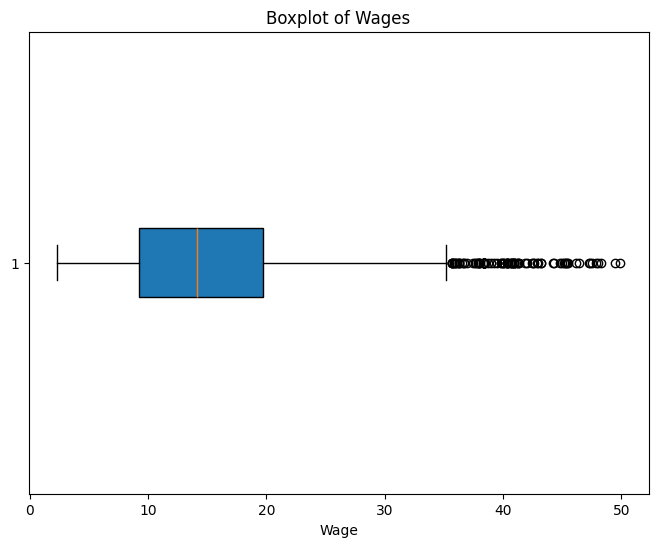

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Wage' column contains the wage data
df["Wage"] = df["Wage"].astype(float)  # Ensure Wage is a float

# Calculate Mean, Median, Standard Deviation
mean_wage = df["Wage"].mean()
median_wage = df["Wage"].median()
std_wage = df["Wage"].std()

# Calculate IQR (Interquartile Range)
q1 = df["Wage"].quantile(0.25)
q3 = df["Wage"].quantile(0.75)
iqr = q3 - q1

# Calculate Percentiles
percentiles = {
    "20th Percentile": df["Wage"].quantile(0.20),
    "40th Percentile": df["Wage"].quantile(0.40),
    "60th Percentile": df["Wage"].quantile(0.60),
    "80th Percentile": df["Wage"].quantile(0.80),
    "100th Percentile (Max)": df["Wage"].max()
}

# Identify Outliers (IQR Rule)
lower_bound = max(0,(q1 - 1.5 * iqr))
upper_bound = q3 + 1.5 * iqr
outliers = df[(df["Wage"] < lower_bound) | (df["Wage"] > upper_bound)]

# Print Results
print(f"Mean Wage: {mean_wage}")
print(f"Median Wage: {median_wage}")
print(f"Standard Deviation of Wage: {std_wage}")
print(f"IQR (Interquartile Range): {iqr}")
print("Percentiles:")
for percentile, value in percentiles.items():
    print(f"  {percentile}: {value}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
print("Outliers:")
print(outliers)

# Generate a Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df["Wage"], vert=False, patch_artist=True)
plt.title("Boxplot of Wages")
plt.xlabel("Wage")
plt.show()

Number of People in Each Percentile Bin:
Percentile Bin
0-20%      798
20-40%     799
40-60%     802
60-80%     797
80-100%    791
Name: count, dtype: int64


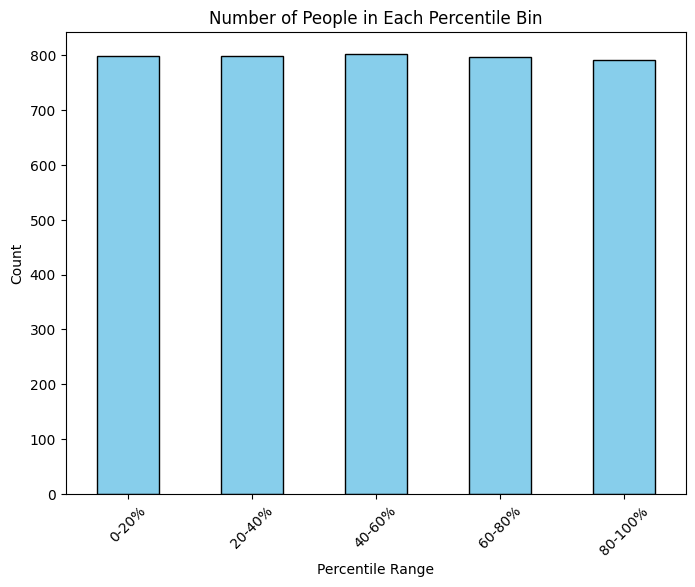

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'Wage' column contains the wage data
df["Wage"] = df["Wage"].astype(float)  # Ensure Wage is a float

# Define percentile bins
bins = [0, 20, 40, 60, 80, 100]  # Percentile edges
bin_labels = ["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"]

# Calculate bin edges based on the percentiles
bin_edges = [df["Wage"].quantile(p / 100) for p in bins]

# Assign each wage to a bin
df["Percentile Bin"] = pd.cut(df["Wage"], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Count the number of people in each bin
bin_counts = df["Percentile Bin"].value_counts().sort_index()

# Print the counts
print("Number of People in Each Percentile Bin:")
print(bin_counts)

# Plot a histogram-like representation
plt.figure(figsize=(8, 6))
bin_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of People in Each Percentile Bin")
plt.xlabel("Percentile Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

here i am going to test if it is normally distributed using shapiro test (need to ask if this is allowed)

In [ ]:
from scipy.stats import shapiro, kstest, norm

# Assuming 'wages' is a list or pandas Series containing wage data
wages = df["Wage"]

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(wages)
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat}, P-value={shapiro_p}")

# Kolmogorov-Smirnov Test
kstest_stat, kstest_p = kstest(wages, 'norm', args=(wages.mean(), wages.std()))
print(f"Kolmogorov-Smirnov Test: Statistic={kstest_stat}, P-value={kstest_p}")


Shapiro-Wilk Test: Statistic=0.9246711923159197, P-value=7.930608482460347e-41
Kolmogorov-Smirnov Test: Statistic=0.08837720502172224, P-value=1.5183840385895807e-27


this implies that the wages do not follow a normal distribution

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Wage' contains the wage data
df["Wage"] = df["Wage"].astype(float)  # Ensure Wage is a float

# Sort the wages in descending order
df = df.sort_values(by="Wage", ascending=False).reset_index(drop=True)

# Calculate the cumulative sum of wages and the total wage pool
df["Cumulative Wage"] = df["Wage"].cumsum()
total_wage_pool = df["Wage"].sum()

# Calculate the cumulative percentage of total wages
df["Cumulative Percentage of Wage"] = (df["Cumulative Wage"] / total_wage_pool) * 100

# Calculate the percentage of the population at each point
df["Population Percentage"] = ((df.index + 1) / len(df)) * 100

# Find the point at which the top 10%, 5%, etc., control a significant fraction
percentiles_of_interest = [25, 5, 1]  # Adjust these values as needed
results = {}

for percentile in percentiles_of_interest:
    controlled_wage = df[df["Population Percentage"] <= percentile]["Cumulative Percentage of Wage"].max()
    results[f"Top {percentile}%"] = controlled_wage

# Print results
for key, value in results.items():
    print(f"{key} of the population controls {value:.2f}% of the total wage pool.")

Top 25% of the population controls 42.66% of the total wage pool.
Top 5% of the population controls 11.60% of the total wage pool.
Top 1% of the population controls 2.77% of the total wage pool.


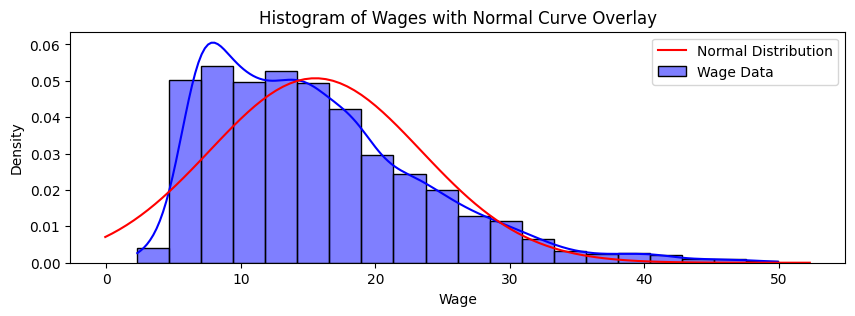

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Assuming 'df' is your DataFrame and 'Wage' contains the wage data
wages = df["Wage"]

# Plot histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 3))
sns.histplot(wages, kde=True, stat="density", bins=20, color="blue", label="Wage Data")

# Overlay normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, wages.mean(), wages.std())
plt.plot(x, p, 'r', label="Normal Distribution")

# Customize plot
plt.title("Histogram of Wages with Normal Curve Overlay")
plt.xlabel("Wage")
plt.ylabel("Density")
plt.legend()
plt.show()


# Analysis 2

This will be the section of analysis 2. We want to test if gender plays a role in peoples wages. To do this we will make the hypothesis H-null be that the mean wage of men mu1 = to the mean wage of women mu2. The H-alternate is that they are not equal to each other. To test this we can use the python library scipy

In [ ]:
import scipy.stats as stats

df["Wage"] = df["Wage"].astype(float)
df["Sex"] = df["Sex"].astype(str)

awages = [x[1]["Wage"] for x in df.iterrows()]
mwages = [x[1]["Wage"] for x in df.iterrows() if x[1]["Sex"] == "Male"]
fwages = [x[1]["Wage"] for x in df.iterrows() if x[1]["Sex"] == "Female"]

print("All Stats\n", pd.Series(awages).describe())
print("\nMale Stats\n", pd.Series(mwages).describe())
print("\nFemale Stats\n", pd.Series(fwages).describe())

All Stats
 count    3987.000000
mean       15.538753
std         7.868565
min         2.300000
25%         9.250000
50%        14.130000
75%        19.720000
max        49.920000
dtype: float64

Male Stats
 count    1986.000000
mean       17.242946
std         8.214166
min         3.000000
25%        10.935000
50%        16.200000
75%        21.940000
max        49.440000
dtype: float64

Female Stats
 count    2001.000000
mean       13.847336
std         7.119164
min         2.300000
25%         8.000000
50%        12.290000
75%        17.400000
max        49.920000
dtype: float64


In [ ]:



# Perform a two-sample t-test
test_results = stats.ttest_ind(mwages, fwages, equal_var=False)  # Use `equal_var=True` if variances are equal

print("T-statistic:", test_results.statistic)
print("P-value:", test_results.pvalue)
print("99% Confidence Interval:", test_results.confidence_interval(0.99))

T-statistic: 13.943783021270717
P-value: 3.676140971641035e-43
99% Confidence Interval: ConfidenceInterval(low=2.768032471028481, high=4.023186103974051)


With a p value this low there is clearly a correlation between wages and sex


--- Comparative Statistics ---

Total Mean: 15.538753448708304
Male Mean: 17.242945619335348
Female Mean: 13.847336331834082


Total Median: 14.13
Male Median: 16.2
Female Median: 12.29


Total Standard Deviation: 7.868565192576419
Male Standard Deviation: 8.214166195127287
Female Standard Deviation: 7.119163606163603


Percentage Difference in Mean Wages: 21.85%



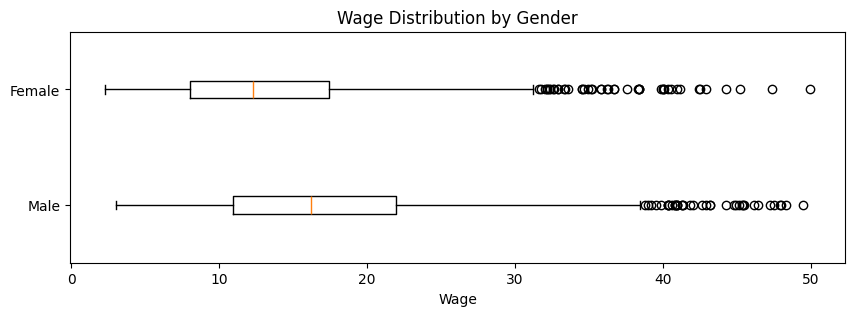

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

all_stats = {
    "Mean": pd.Series(awages).mean(),
    "Median": pd.Series(awages).median(),
    "Standard Deviation": pd.Series(awages).std()
}
male_stats = {
    "Mean": pd.Series(mwages).mean(),
    "Median": pd.Series(mwages).median(),
    "Standard Deviation": pd.Series(mwages).std()
}
female_stats = {
    "Mean": pd.Series(fwages).mean(),
    "Median": pd.Series(fwages).median(),
    "Standard Deviation": pd.Series(fwages).std()
}

# Calculate percentage difference in means
percentage_diff = ((male_stats["Mean"] - female_stats["Mean"]) / all_stats["Mean"]) * 100

# Print comparative statistics
print("\n--- Comparative Statistics ---")
print(f"""
Total Mean: {all_stats['Mean']}
Male Mean: {male_stats['Mean']}
Female Mean: {female_stats['Mean']}
""")
print(f"""
Total Median: {all_stats['Median']}
Male Median: {male_stats['Median']}
Female Median: {female_stats['Median']}
""")
print(f"""
Total Standard Deviation: {all_stats['Standard Deviation']}
Male Standard Deviation: {male_stats['Standard Deviation']}
Female Standard Deviation: {female_stats['Standard Deviation']}
""")
print(f"""
Percentage Difference in Mean Wages: {percentage_diff:.2f}%
""")

# Visualize the distributions
plt.figure(figsize=(10, 3))
plt.boxplot([mwages, fwages], labels=["Male", "Female"], vert=False)
plt.title("Wage Distribution by Gender")
plt.xlabel("Wage")
plt.show()

we can see here that being a man results in making more in wages but lets also take into account the amount of schooling that each person has taken

# Analysis 3 (V1 - OLD)

This will be analysis 3 we are going to look at the correlationship between age and wages by splitting the people into different age brackets and using a ANOVA test

In [ ]:
from scipy.stats import f_oneway

# Example data

first_age_bracket = [x[1]["Wage"] for x in df.iterrows() if 0 <= x[1]["Age"] < 25]
second_age_bracket = [x[1]["Wage"] for x in df.iterrows() if 25 <= x[1]["Age"] < 40]
third_age_bracket = [x[1]["Wage"] for x in df.iterrows() if 40 <= x[1]["Age"] < 55]
fourth_age_bracket = [x[1]["Wage"] for x in df.iterrows() if 55 <= x[1]["Age"] < 65]
fifth_age_bracket = [x[1]["Wage"] for x in df.iterrows() if 65 <= x[1]["Age"]]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(first_age_bracket, second_age_bracket, third_age_bracket, fourth_age_bracket, fifth_age_bracket)

print(f"F-statistic: {f_stat}, p-value: {p_value}")

print("\nAges < 25\n", pd.Series(first_age_bracket).describe())
print("\nAges 25 - 40\n", pd.Series(second_age_bracket).describe())
print("\nAges 40 - 55\n", pd.Series(third_age_bracket).describe())
print("\nAges 55 - 65\n", pd.Series(fourth_age_bracket).describe())
print("\nAges > 65\n", pd.Series(fifth_age_bracket).describe())

F-statistic: 206.66643599053603, p-value: 2.6686117452293733e-161

Ages < 25
 count    695.000000
mean       8.896935
std        4.530361
min        3.000000
25%        6.700000
50%        7.420000
75%        9.790000
max       46.150000
dtype: float64

Ages 25 - 40
 count    1683.000000
mean       15.759043
std         6.807260
min         3.150000
25%        10.600000
50%        14.970000
75%        19.200000
max        48.000000
dtype: float64

Ages 40 - 55
 count    1231.000000
mean       18.453128
std         8.215539
min         2.300000
25%        12.335000
50%        17.230000
75%        23.235000
max        49.920000
dtype: float64

Ages 55 - 65
 count    350.000000
mean      17.413200
std        8.609025
min        3.130000
25%       10.637500
50%       15.440000
75%       22.552500
max       49.440000
dtype: float64

Ages > 65
 count    28.000000
mean     15.598214
std      11.044541
min       6.000000
25%       8.112500
50%      10.610000
75%      20.110000
max      45.2200

This p value means that age is extremely relevant in correlation with wage

In [ ]:
brackets = {
    "Under 25": first_age_bracket,
    "25-39": second_age_bracket,
    "40-54": third_age_bracket,
    "55-64": fourth_age_bracket,
    "65 and over": fifth_age_bracket
}

# Calculate summary statistics
overall_mean = df["Wage"].mean()
overall_std = df["Wage"].std()

summary = {
    group: {
        "Mean": sum(values) / len(values) if values else None,
        "Lowest": min(values) if values else None,
        "Highest": max(values) if values else None,
        "Proportion to Overall Mean": (sum(values) / len(values)) / overall_mean if values else None,
        "Z-Score": ((sum(values) / len(values)) - overall_mean) / overall_std if values else None
    }
    for group, values in brackets.items()
}

# Convert to a DataFrame for display
summary_df = pd.DataFrame(summary).T

# Display summary
print(summary_df)

                  Mean  Lowest  Highest  Proportion to Overall Mean   Z-Score
Under 25      8.896935    3.00    46.15                    0.572564 -0.844095
25-39        15.759043    3.15    48.00                    1.014177  0.027996
40-54        18.453128    2.30    49.92                    1.187555  0.370382
55-64        17.413200    3.13    49.44                    1.120630  0.238220
65 and over  15.598214    6.00    45.22                    1.003827  0.007557


This metric compares the average wage of each age group to the overall average wage.
Value > 1: The group’s average wage is higher than the overall mean.
Value < 1: The group’s average wage is lower than the overall mean.
Value = 1: The group’s average wage is equal to the overall mean.

The Z-Score indicates how many standard deviations the group’s mean wage is from the overall mean wage.
Positive Z-Score: The group’s mean is above the overall mean.
Negative Z-Score: The group’s mean is below the overall mean.
Z = 0: The group’s mean equals the overall mean.

average being one so 1.18 means 18 percent above mean avg
z score represents how many std away from mean it is

We can conclude from this analysis that age play a major role in wage. with the age gorup of 40-54 making almost 20 percent more than all age groups. and anyone under 25 signifigantly making less than that

# Analysis 3 (V2)

Getting a Breakdown of Education

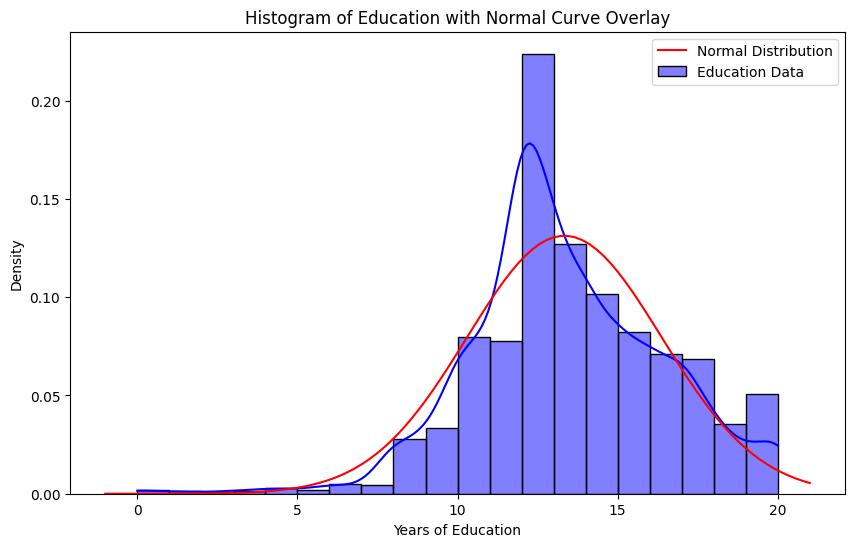

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

education = df["Education"]

# Plot histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(education, kde=True, stat="density", bins=20, color="blue", label="Education Data")

# Overlay normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, education.mean(), education.std())
plt.plot(x, p, 'r', label="Normal Distribution")

# Customize plot
plt.title("Histogram of Education with Normal Curve Overlay")
plt.xlabel("Years of Education")
plt.ylabel("Density")
plt.legend()
plt.show()


Education ANOVA

*NOTE: Our dataset is from 1994. The Ontario Education System had 13 years of standardized schooling up until 2003, and so that will be used as the cutoff for secondary school. Secondary School begins at Grade 10 in Canada.*

F-statistic: 107.39986898880763, p-value: 1.13310710896678e-106
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.399     0.884    -1.436     0.639
 (0 - 2)     -1.148     0.093    -2.399     0.102
 (0 - 3)     -3.667     0.000    -4.928    -2.407
 (0 - 4)     -7.095     0.000    -8.436    -5.754
 (0 - 5)     -8.568     0.000   -10.250    -6.886
 (1 - 0)      0.399     0.884    -0.639     1.436
 (1 - 2)     -0.750     0.286    -1.767     0.267
 (1 - 3)     -3.268     0.000    -4.298    -2.239
 (1 - 4)     -6.696     0.000    -7.823    -5.570
 (1 - 5)     -8.169     0.000    -9.687    -6.652
 (2 - 0)      1.148     0.093    -0.102     2.399
 (2 - 1)      0.750     0.286    -0.267     1.767
 (2 - 3)     -2.519     0.000    -3.762    -1.275
 (2 - 4)     -5.946     0.000    -7.272    -4.621
 (2 - 5)     -7.420     0.000    -9.089    -5.750
 (3 - 0)      3.667     0.000     2.407     4.928
 (3 - 1)      3.26

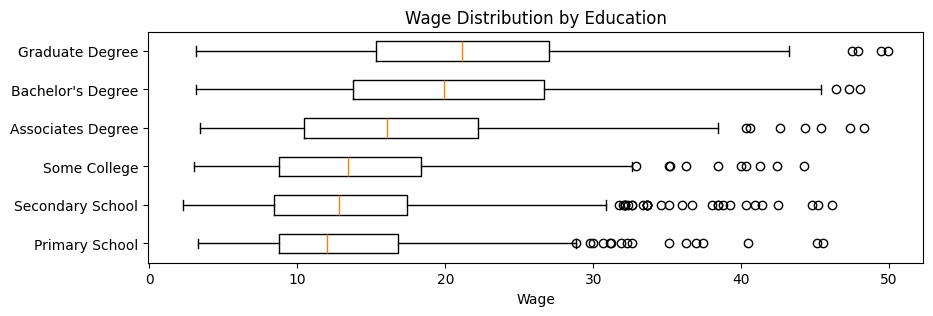

In [ ]:
from scipy.stats import f_oneway, tukey_hsd

#0 - 10.00
primary_school = [x[1]["Wage"] for x in df.iterrows() if 0 <= x[1]["Education"] <= 10]
primary_school_percent = len(primary_school) / len(awages)
#10.01 - 13.00
secondary_school = [x[1]["Wage"] for x in df.iterrows() if 10 < x[1]["Education"] <= 13]
secondary_school_percent = len(secondary_school) / len(awages)
#13.01 - 14.99
some_college = [x[1]["Wage"] for x in df.iterrows() if 13 < x[1]["Education"] < 15]
some_college_percent = len(some_college) / len(awages)
#15.00 - 16.49
associates_degree = [x[1]["Wage"] for x in df.iterrows() if 15 <= x[1]["Education"] < 16.5]
associates_degree_percent = len(associates_degree) / len(awages)
#16.50 - 18.49
bachelors_degree = [x[1]["Wage"] for x in df.iterrows() if 16.5 <= x[1]["Education"] < 18.5]
bachelors_degree_percent = len(bachelors_degree) / len(awages)
#More than 18.49
graduate_degree = [x[1]["Wage"] for x in df.iterrows() if 18.5 <= x[1]["Education"]]
graduate_degree_percent = len(graduate_degree) / len(awages)

# Perform one-way ANOVA
f_stat, p_value = f_oneway(primary_school, secondary_school, some_college, associates_degree, bachelors_degree, graduate_degree)
# Perform Tukey's Procedure
procedure_result = tukey_hsd(primary_school, secondary_school, some_college, associates_degree, bachelors_degree, graduate_degree)


print(f"F-statistic: {f_stat}, p-value: {p_value}")
print(procedure_result)

print("\nPrimary School ({ratio:.2%})\n".format(ratio=primary_school_percent), pd.Series(primary_school).describe())
print("\nSecondary School ({ratio:.2%})\n".format(ratio=secondary_school_percent), pd.Series(secondary_school).describe())
print("\nSome College ({ratio:.2%})\n".format(ratio=some_college_percent), pd.Series(some_college).describe())
print("\nAssociates Degree ({ratio:.2%})\n".format(ratio=associates_degree_percent), pd.Series(associates_degree).describe())
print("\nBachelor's Degree ({ratio:.2%})\n".format(ratio=bachelors_degree_percent), pd.Series(bachelors_degree).describe())
print("\nGraduate Degree ({ratio:.2%})\n".format(ratio=graduate_degree_percent), pd.Series(graduate_degree).describe())

plt.figure(figsize=(10, 3))
plt.boxplot([primary_school, secondary_school, some_college, associates_degree, bachelors_degree, graduate_degree], labels=["Primary School", "Secondary School", "Some College", "Associates Degree", "Bachelor's Degree", "Graduate Degree"], vert=False)
plt.title("Wage Distribution by Education")
plt.xlabel("Wage")
plt.show()
